# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [1]:
from math import pi
def mult_dec_pi(a, b):
    if a<=15 and b<=15:
        pi_string=str(pi)
        a1=float(pi_string[a+1])
        b1=float(pi_string[b+1])
        result1 = a1 * b1
        return result1
    
    elif a>15 and b<=15:
            
        return 'Valor incorrecto para a'
    
    elif a<=15 and b>15:
            
        return 'Valor incorrecto para b'
    
    else:
            
        return 'Valor incorrecto para a y b'
    

In [2]:
mult_dec_pi(a=2, b=4)
# 20.0

20.0

In [3]:
mult_dec_pi(a=5, b=10)
# 45.0

45.0

In [4]:
mult_dec_pi(a=14, b=1)
# 9.0

9.0

In [5]:
mult_dec_pi(a=6, b=8)
# 10.0

10.0

In [6]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Valor incorrecto para a'

In [7]:
mult_dec_pi(a=4, b=20)

'Valor incorrecto para b'

In [8]:
mult_dec_pi(a=16, b=20)

'Valor incorrecto para a y b'

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0,0.5,'Employed')

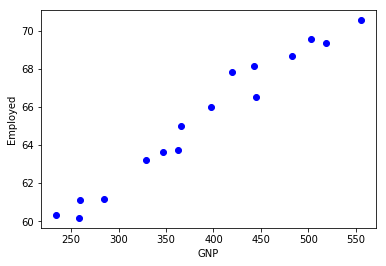

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

In [10]:
x = data[:,2]
y = data[:,1]
y

array([ 60.323,  61.122,  60.171,  61.187,  63.221,  63.639,  64.989,
        63.761,  66.019,  67.857,  68.169,  66.513,  68.655,  69.564,
        69.331,  70.551])

In [11]:
X = np.c_[np.ones(x.shape),x]
X

array([[   1.   ,  234.289],
       [   1.   ,  259.426],
       [   1.   ,  258.054],
       [   1.   ,  284.599],
       [   1.   ,  328.975],
       [   1.   ,  346.999],
       [   1.   ,  365.385],
       [   1.   ,  363.112],
       [   1.   ,  397.469],
       [   1.   ,  419.18 ],
       [   1.   ,  442.769],
       [   1.   ,  444.546],
       [   1.   ,  482.704],
       [   1.   ,  502.601],
       [   1.   ,  518.173],
       [   1.   ,  554.894]])

In [12]:
XTX = np.dot(X.T,X);XTX_inv = np.linalg.inv(XTX);XTy = np.dot(X.T, y)
print(XTX);print(XTy);print(XTX_inv)

[[  1.60000000e+01   6.20317500e+03]
 [  6.20317500e+03   2.55315156e+06]]
[   1045.072    410322.73457]
[[  1.07680440e+00  -2.61621999e-03]
 [ -2.61621999e-03   6.74807978e-06]]


In [13]:
betas = np.dot(XTX_inv,XTy)
betas

array([  5.18435898e+01,   3.47522943e-02])

In [14]:
#Comprobación 
import scipy as sp
params = sp.polyfit(data[:,2],data[:,1],1)
params

array([  3.47522943e-02,   5.18435898e+01])

Text(0,0.5,'Employed')

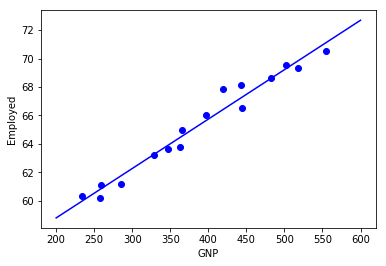

In [15]:
x = np.linspace(200, 600)
plt.plot(x, betas[0] + betas[1]*x, 'b-')
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

# Exercise 01.3

Analyze the baby names dataset using pandas

In [20]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [21]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [22]:
import pandas as pd
import pandas_profiling

pandas_profiling.ProfileReport(names)

D:\Anaconda3\lib\site-packages\pandas_profiling\base.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "D:\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "D:\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in st

Number of variables,5
Number of observations,258000
Total Missing (%),0.0%
Total size in memory,9.8 MiB
Average record size in memory,40.0 B
Numeric,2
Categorical,3
Date,0
Text (Unique),0
Rejected,0
Distinct count,6782


Se encontró que la base de datos está conformada por 258000 registros de nombres de bebés nacidos entre el año 1880 y 2008. La proporción entre niños y niñas es la misma.

### segment the data into boy and girl names

In [23]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()
boys.shape,girls.shape

((129000, 5), (129000, 5))

### Analyzing the popularity of a name over time

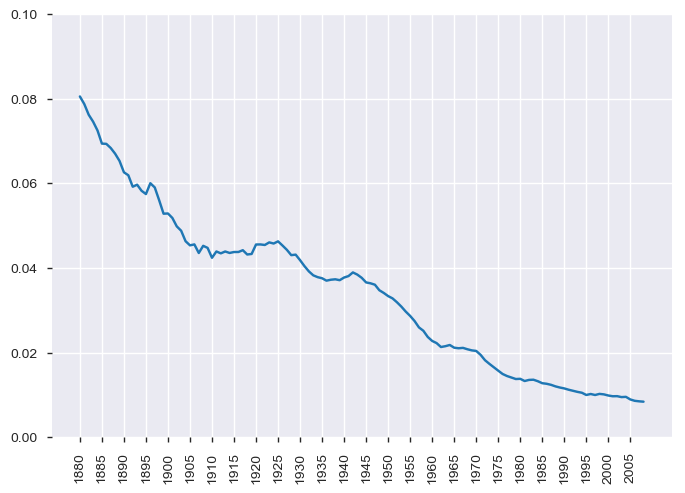

In [26]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

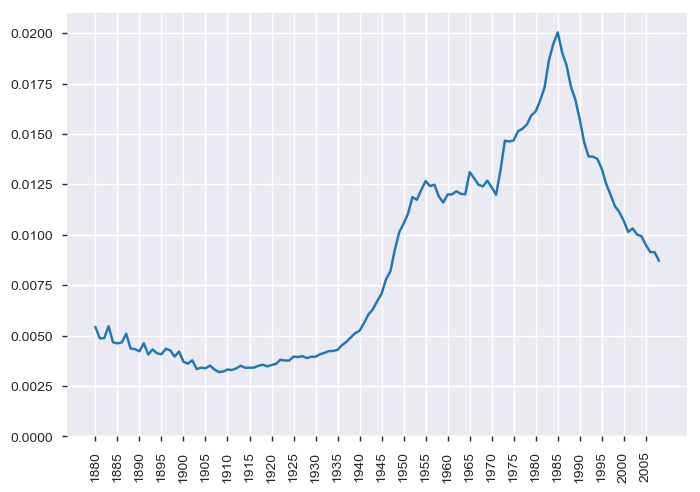

In [27]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.021])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [28]:
años = pd.pivot_table(names, index='year', aggfunc=np.sum)
años.head(),años.tail()

(          prop
 year          
 1880  1.865292
 1881  1.863129
 1882  1.858517
 1883  1.862091
 1884  1.858641,           prop
 year          
 2004  1.515372
 2005  1.507601
 2006  1.491294
 2007  1.478558
 2008  1.467930)

In [29]:
boys['decada'] = 0
decada=list(range(1880,2010,10))
decada

[1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]

In [30]:
for i in range(len(decada)-1):
    boys.ix[(boys.year >= decada[i]) & (boys.year < decada[i+1]),'decada'] = i
    
boys.head(),boys.tail()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


(   year     name      prop  sex soundex  decada
 0  1880     John  0.081541  boy    J500       0
 1  1880  William  0.080511  boy    W450       0
 2  1880    James  0.050057  boy    J520       0
 3  1880  Charles  0.045167  boy    C642       0
 4  1880   George  0.043292  boy    G620       0,
         year    name      prop  sex soundex  decada
 128995  2008  Kolten  0.000090  boy    K435       0
 128996  2008  Damari  0.000089  boy    D560       0
 128997  2008    Hugh  0.000089  boy    H200       0
 128998  2008  Jensen  0.000089  boy    J525       0
 128999  2008   Yurem  0.000089  boy    Y650       0)

In [31]:
tabla1=pd.pivot_table(boys, index='name', columns='decada',aggfunc=np.sum, values='prop')
tabla1.max()

decada
0     0.835006
1     0.655642
2     0.577876
3     0.544213
4     0.506538
5     0.544311
6     0.527460
7     0.413064
8     0.426833
9     0.413498
10    0.345842
11    0.224069
dtype: float64

In [32]:
tabla1.idxmax()

decada
0        John
1        John
2        John
3        John
4      Robert
5      Robert
6       James
7       James
8     Michael
9     Michael
10    Michael
11    Michael
dtype: object

En las primeras cuatro décadas (desde 1980 hasta 1910) el nombre más común fue 'John', donde el 83,5% de los niños en la primera década se llamaba así. Las siguientes dos décadas (desde 1911 hasta 1930) fue 'Robert', seguido por 'James' los siguientes 20 años, y finalmente 'Michael' es el nombre más común recientemente. 

# Exercise 01.4

Which has been the most popular girl name?


In [33]:
tabla2=pd.pivot_table(girls, index='name',aggfunc=np.sum,values='prop')
tabla2.idxmax()

prop    Mary
dtype: object

El nombre de niña más popular es Mary.

# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [34]:
girls20s = girls[girls.year >= 2000].copy()
girls20s.shape

(9000, 5)

In [35]:
girls20s.head()

,year,name,prop,sex,soundex
249000,2000,Emily,0.013017,girl,E540
249001,2000,Hannah,0.011569,girl,H500
249002,2000,Madison,0.010017,girl,M325
249003,2000,Ashley,0.009027,girl,A240
249004,2000,Sarah,0.008865,girl,S600


In [36]:
tabla3=pd.pivot_table(girls20s, index='name',aggfunc=np.sum,values='prop')
tabla3.idxmax()

prop    Emily
dtype: object

El nombre Emily es el más frecuente de la última década.